In [1]:
import pandas as pd
import psycopg2
import generator
import random
import string

ModuleNotFoundError: No module named 'psycopg2'

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="lichess",
    user="postgres",
    password="")

cur = conn.cursor()
cur.execute('SELECT version()')
db_version = cur.fetchone() # display the PostgreSQL database server version
print(db_version)

('PostgreSQL 10.19, compiled by Visual C++ build 1800, 64-bit',)


In [17]:
# ROLLBACK
generator.rollback(conn=conn)

In [ ]:
gamemodes, courses = generator.getGameModes(conn), generator.getCourses(conn)
gamemodes, courses

In [7]:
players = generator.generatePlayers(1000)
players

In [ ]:
tournaments, games, playerstournaments, playersgames = generator.makeTournaments(conn, 150, players)
tournaments, games, playerstournaments, playersgames

In [11]:
for player in players:
    generator.insertPlayer(conn, player)

In [13]:
for tournament in tournaments:
    generator.insertTournament(conn, tournament)

In [15]:
for game in games:
    generator.insertGame(conn, game)

In [17]:
for playertournament in playerstournaments:
    generator.insertPlayerTournament(conn, playertournament)

In [19]:
for playergame in playersgames:
    generator.insertPlayerGame(conn, playergame)

In [32]:
players_courses_id = 1
for player in players:
    for _ in range(random.randint(1, 3)):
        course = random.choice(courses)
        generator.insertPlayersCourses(conn, generator.PlayerCourses(
            players_courses_id=players_courses_id,
            player_id=player.player_id,
            course_id=course['course_id']
        ))
        players_courses_id += 1

In [37]:
tasks = generator.generateTasks(courses)
tasks

In [40]:
for task in tasks:
    generator.insertTask(conn, task)

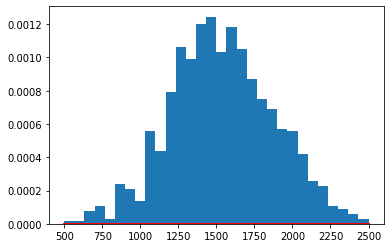

In [26]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0.01, 0.1 # mean and standard deviation
N = 1000

s = generator.generateRatings(N)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()